## Why We Need Interaction and Polynomial Terms
In the real world, most relationships between variables are difficult to describe with one simple straight line. For example, consider the code and scatter plot below showing happiness level (y-axis) versus stress level (x-axis) colored by exercise.

```python
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='stress', y='happy', hue='exercise', markers=['o','x'], fit_reg=False, data=happiness)
plt.show()
```
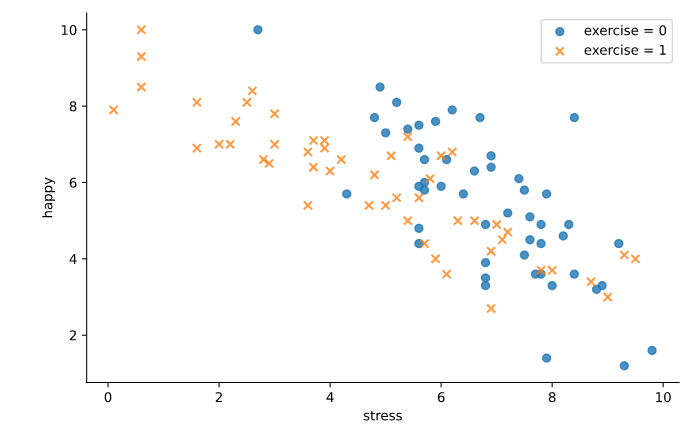

Imagine drawing two lines through the points: one for the orange crosses of the exercise group and one for the blue circles of the non-exercise group. Your lines might look something like this:

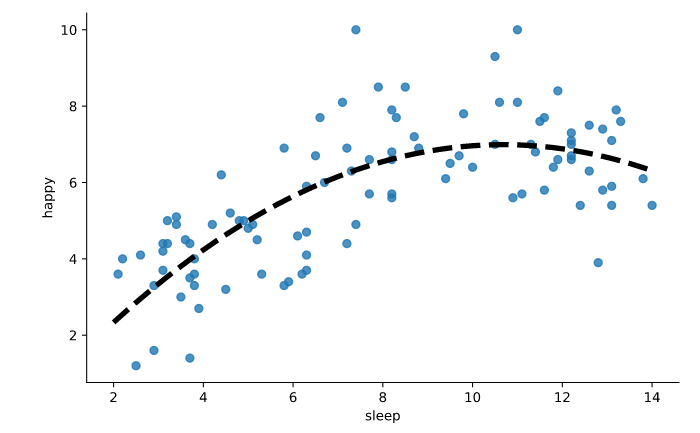

Scatter plot showing happy level on the y-axis against stress level on the x-axis. Points for the exercise group are given as orange crosses and those for the non-exercise group are given as blue circles. Two negatively sloped lines intersect starting at different intercepts: a solid orange line for the exercise group and a dotted blue line for the non-exercise group.

Note that the lines have both different intercepts AND different slopes. This means that exercise may modify the relationship between happiness and stress.

Other times, the relationship between two variables appears more CURVILINEAR, or curved in shape, than straight.

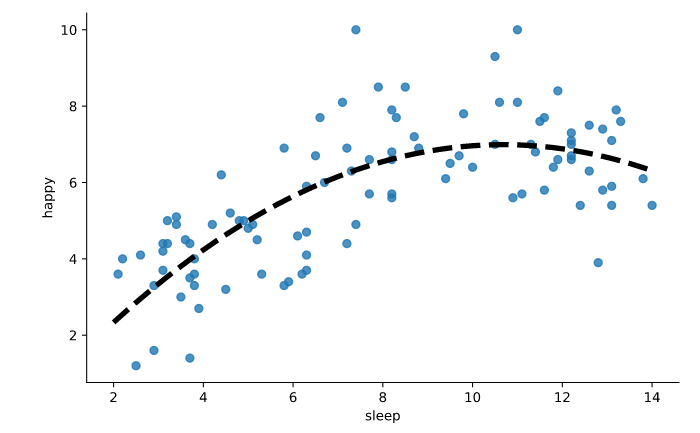

Scatter plot showing happy level verses amount of sleep. From left to right, the points increase, peak, and then begin to decrease. A dashed line follows the curve of the points.

When we are using multiple regression to investigate the relationship between more than two variables, we may use interaction and polynomial terms to capture more complex relationships among the variables. To do this in Python, we modify our regression model formula to include extra terms. As a result, we also have to adjust our interpretations to match the new complexity of the model.

## Visualizing Interactions: Binary and Quantitative
Let’s return to a plot we saw in Exercise #1.

Scatter plot showing happy level on the y-axis against stress level on the x-axis. Points for the exercise group are given as orange crosses and those for the non-exercise group are given as blue circles. Two negatively sloped lines intersect starting at different intercepts: a solid orange line for the exercise group and a dotted blue line for the non-exercise group.

The data for this plot is from a fictional study on happiness that measures the following variables about its participants:

* happy – their happiness level on a quantitative scale of 1 to 10
* stress – their stress level on a quantitative scale of 1-10
* exercise – whether they exercise regularly, where 1 = yes and 0 = no

We have drawn in a line estimating the relationship between stress and happiness for each exercise group. The line for the group that exercises appears flatter than that for the non-exercise group.

This indicates that exercise might modify the relationship between stress and happiness. Perhaps regular exercise buffers the effects of stress on happiness. Or perhaps people who exercise are also likely to do stress-reducing activities like meditation. While we don’t know the exact reason, we do see a potential difference when we examine the exercise groups separately.

If we fit a regression modeling happy from the quantitative predictor stress and the binary predictor exercise, we get the following results:

```python
import statsmodels.api as sm
model = sm.OLS.from_formula('happy ~ stress + exercise', data=happiness).fit()
print(model.params)
# Output:
# Intercept    10.256296
# stress       -0.707925
# exercise     -0.894058
```

Using these coefficients, we can plot two lines with differing intercepts for each exercise group.

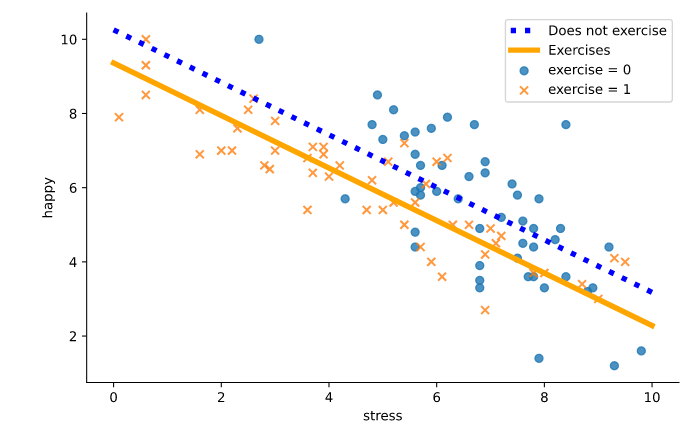



Our lines have different intercepts, but seem to be missing the steeper slope of the points for the non-exercise group. Since a model for happy with just stress and exercise as predictors only allows for the intercepts to differ, we must add an interaction term to our model to capture the difference in slopes.

#### Instructions
1.
The plants dataset has been loaded for you in script.py. Fit a multiple regression predicting height with weight and species as predictors and save the results as model.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Print the intercept and coefficients of model. What do the coefficients tell us about the relationships between the variables?

Checkpoint 3 Passed

Stuck? Get a hint
3.
Remove the # symbols to uncomment the code and run the plot of height and weight colored by species. Does the coefficient on weight seem to describe the slope for both species of plant?

```python
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import codecademylib3

plants = pd.read_csv('plants.csv')

# Fit regression model here:
model = sm.OLS.from_formula('height ~ weight + species', data = plants).fit()
# Print coefficients here:
print(model.params)
# Uncomment the scatter plot below:
sns.lmplot(x='weight', y='height', hue='species', markers=['o','x'], fit_reg=True, data=plants)
plt.show()

Intercept       6.953395
species[T.B]    0.714273
weight          1.992474
dtype: float64
```